frequencies: (93800, 784, 32), losses: (93800,)


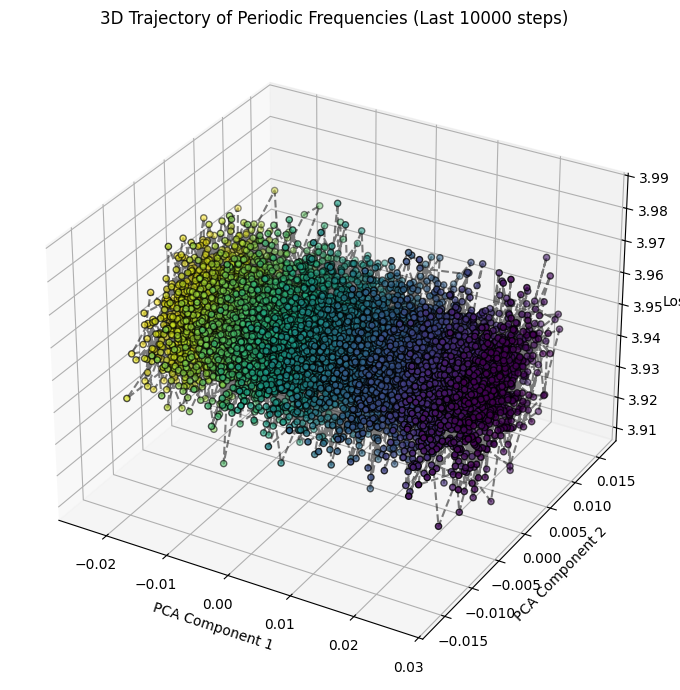

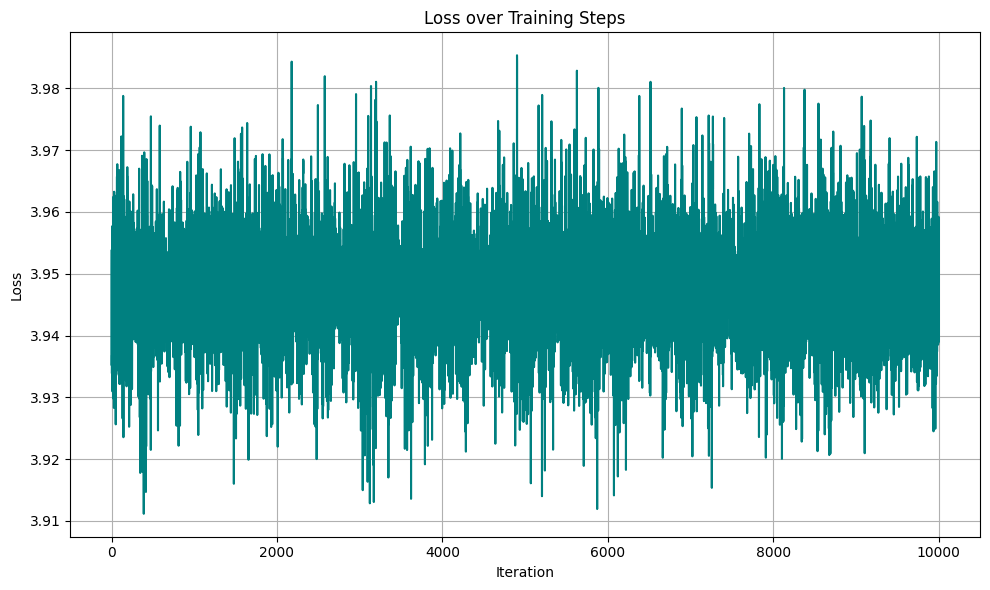

In [ ]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

sys.path.append("/home/keramika/SGDiffusion")

from src.utils import LOGGER

CHECKPOINT_DIR = "/home/keramika/SGDiffusion/data/checkpoints/exp_mlp_plr"
log_name = "MLP_PLR_alpha_1e-04_log"
key = "frequencies"

LOGGER.reset()
LOGGER.load(os.path.join(CHECKPOINT_DIR, log_name))

frequencies = np.array(LOGGER.dict[key])
losses = np.array(LOGGER.dict["loss"])
print(f"frequencies: {frequencies.shape}, losses: {losses.shape}")

flat_weights = frequencies.reshape(frequencies.shape[0], -1)
last_n = min(10000, flat_weights.shape[0])

flat_weights = flat_weights[-last_n:]
losses = losses[-last_n:]

pca = PCA(n_components=2)
trajectory_2d = pca.fit_transform(flat_weights)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = np.linspace(0, 1, last_n)
ax.scatter(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    c=colors, cmap='viridis', edgecolor='k'
)
ax.plot(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    color='black', alpha=0.5, linestyle='--'
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Loss')
ax.set_title(f"3D Trajectory of Periodic Frequencies (Last {last_n} steps)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses, color='teal')
plt.title("Loss over Training Steps")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()